## 1. Data Loading

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/hepatitis.csv"
df = pd.read_csv(url)
# df = pd.read_csv('hepatitis.csv') #load dataset from local machine
df.tail()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2
153,1,43,1,2.0,2,1,2,2,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2


## 2. Data Preprocessing

In [2]:
df.isnull().sum() # Check for null values

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [3]:
df[df.isnull().any(axis=1)] # Check for null values

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0,20,1,1.0,2,2,2,2,2.0,NaN,2.0,2.0,2.0,2.0,0.9,89.0,152.0,4.0,NaN,2
148,0,36,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.6,120.0,30.0,4.0,NaN,2
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2


In [4]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print("Mean of",column,":", df[column].mean())
        print("Median of", column,":", df[column].median())

Mean of STEROID : 1.5098039215686274
Median of STEROID : 2.0
Mean of LIVER BIG : 1.8275862068965518
Median of LIVER BIG : 2.0
Mean of LIVER FIRM : 1.5833333333333333
Median of LIVER FIRM : 2.0
Mean of SPLEEN PALPABLE : 1.8
Median of SPLEEN PALPABLE : 2.0
Mean of SPIDERS : 1.66
Median of SPIDERS : 2.0
Mean of ASCITES : 1.8666666666666667
Median of ASCITES : 2.0
Mean of VARICES : 1.88
Median of VARICES : 2.0
Mean of BILIRUBIN : 1.42751677852349
Median of BILIRUBIN : 1.0
Mean of ALK PHOSPHATE : 105.32539682539682
Median of ALK PHOSPHATE : 85.0
Mean of SGOT : 85.89403973509934
Median of SGOT : 58.0
Mean of ALBUMIN : 3.8172661870503606
Median of ALBUMIN : 4.0
Mean of PROTIME : 61.85227272727273
Median of PROTIME : 61.0


In [5]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna(df[column].mean())

In [6]:
df.isnull().sum() # Check for null values

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in df.columns[1:]:
    df[column] = scaler.fit_transform(df[[column]])

In [8]:
df.tail()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
149,1,0.549296,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.948052,0.294890,0.359621,0.279070,0.500000,1.0
150,0,0.521127,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.077922,0.371747,0.201893,0.511628,0.618523,1.0
151,0,0.760563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.064935,0.182156,0.009464,0.465116,0.618523,1.0
152,0,0.647887,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.155844,0.204461,0.007886,0.465116,0.480000,1.0
153,1,0.507042,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.116883,0.275093,0.007886,0.232558,0.420000,1.0


In [9]:
y = df[['Class']]
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [10]:
x = df.drop('Class', axis=1)
x.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.618523,0.0
1,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581,0.618523,0.0
2,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860,0.618523,0.0
3,0.338028,0.0,0.509804,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860,0.800000,0.0
4,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.294890,0.293375,0.441860,0.618523,0.0


## 3. Decision Tree Model

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=2)

In [12]:
xtrain.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
100,0.211268,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.294890,0.015773,0.399364,0.618523,1.0
28,0.760563,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.129870,0.193309,0.017350,0.395349,1.000000,0.0
129,0.661972,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.025237,0.558140,0.000000,1.0
0,0.323944,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.618523,0.0
27,0.718310,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.142857,0.553903,0.064669,0.139535,0.360000,0.0


In [13]:
xtrain.shape

(107, 19)

In [14]:
xtest.shape

(47, 19)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [16]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

## 4. Model Evaluation

In [17]:
ytest["Predicted_Class"] = clf.predict(xtest)

In [18]:
ytest.head()

,Class,Predicted_Class
12,0,0
3,0,0
82,0,1
6,1,0
113,0,0


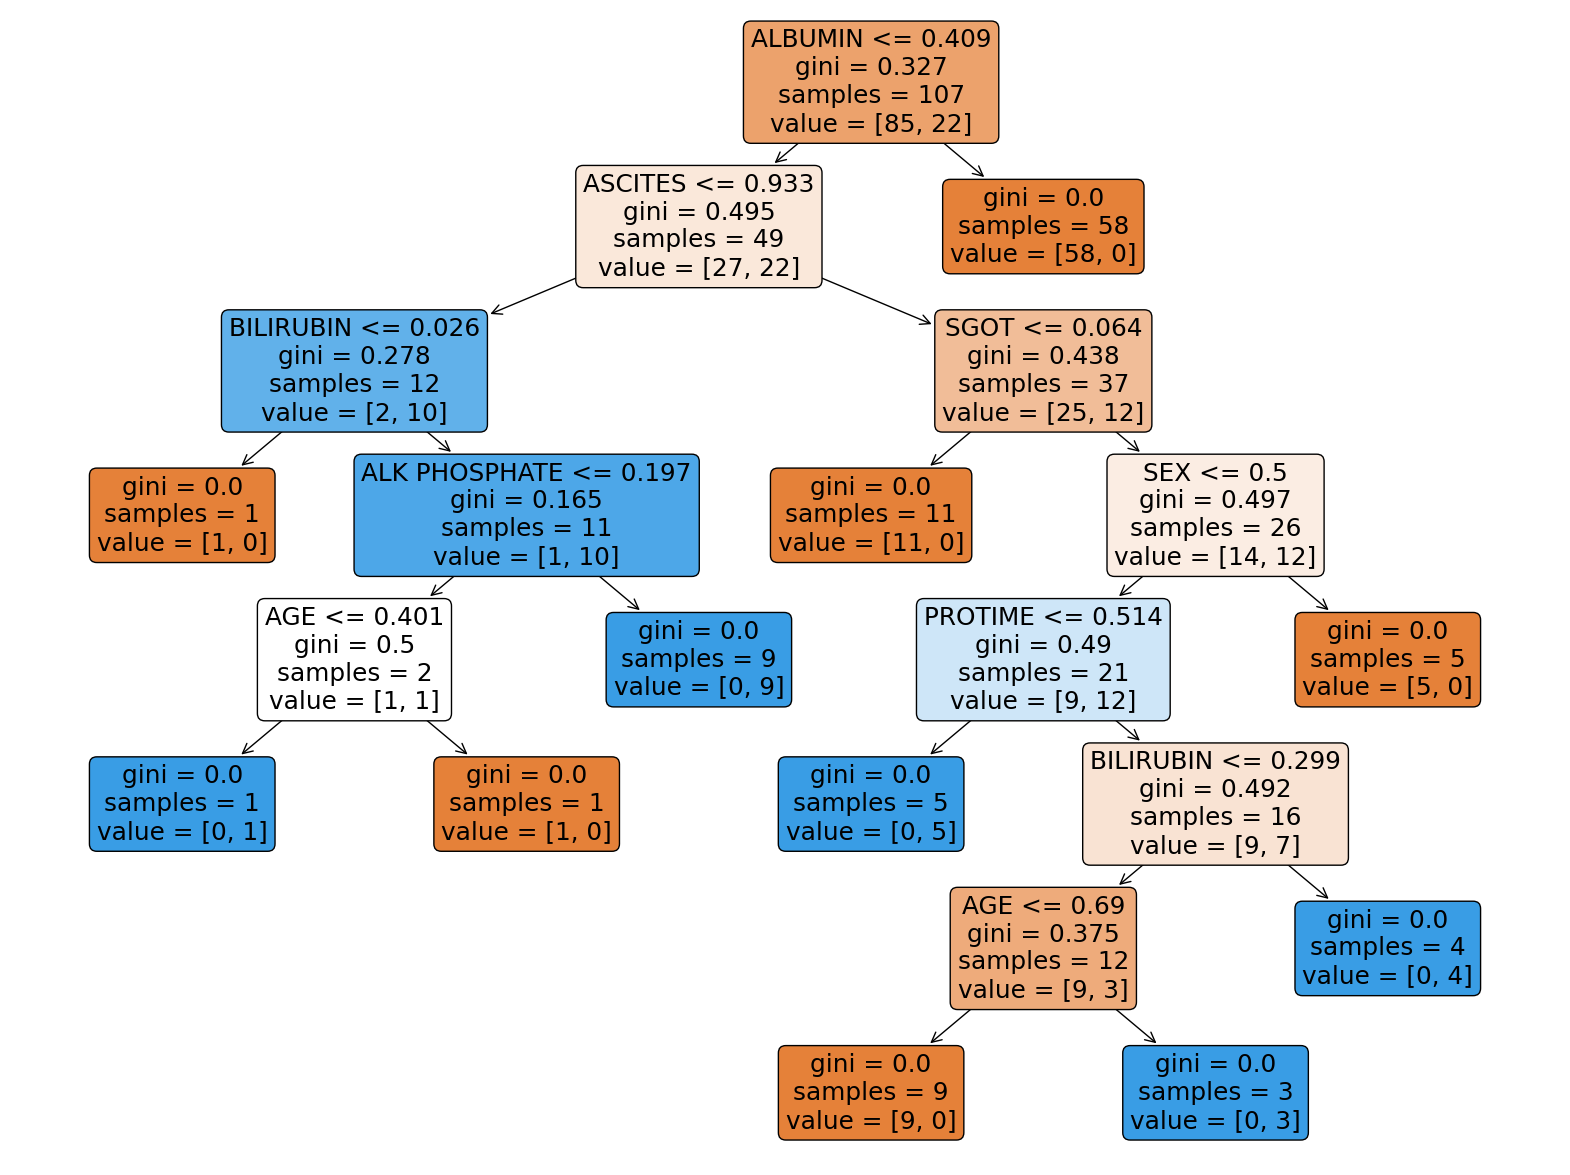

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))  # Adjust the figure size as needed
plot_tree(clf, feature_names=x.columns, rounded=True, filled=True)
plt.show()

In [20]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
accuracy_score(ytest.Class, ytest.Predicted_Class)

0.8085106382978723

In [21]:
confusion_matrix(ytest.Class, ytest.Predicted_Class)

array([[33,  4],
       [ 5,  5]], dtype=int64)

In [22]:
cm = confusion_matrix(ytest.Class, ytest.Predicted_Class)
cm

array([[33,  4],
       [ 5,  5]], dtype=int64)

<Axes: >

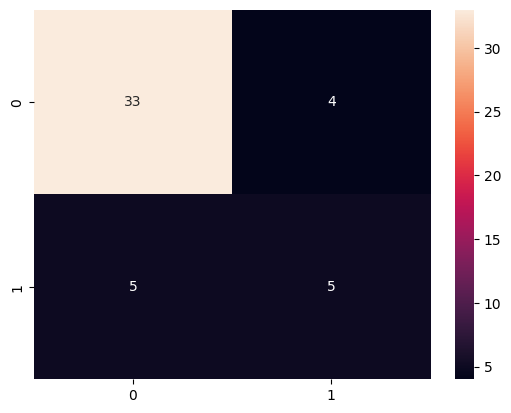

In [23]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [24]:
xtest.corr()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
AGE,1.000000,0.078900,-0.137836,-0.038022,-0.366032,-0.148491,-0.022931,-0.130465,-0.088024,-0.105924,-0.082392,0.014784,0.012115,0.157092,0.127201,0.025050,-0.248501,-0.207126,0.179928
SEX,0.078900,1.000000,-0.195768,-0.165297,0.031753,-0.081791,0.095482,0.083126,0.169034,0.013116,0.087016,0.054070,0.037102,-0.087804,0.078035,-0.112206,-0.075818,0.038658,-0.189466
STEROID,-0.137836,-0.195768,1.000000,-0.042890,0.118463,0.265322,0.075959,0.293420,-0.041114,0.163103,0.102884,0.258575,-0.110639,-0.089755,-0.199119,0.156698,0.399695,-0.011033,-0.313544
ANTIVIRALS,-0.038022,-0.165297,-0.042890,1.000000,0.090752,-0.101193,-0.076533,-0.015765,0.206206,-0.012709,-0.262443,-0.216481,-0.180738,0.219708,0.312970,0.030529,-0.157460,-0.065832,0.219844
FATIGUE,-0.366032,0.031753,0.118463,0.090752,1.000000,0.589256,0.389804,0.291028,0.381562,0.165392,0.453240,0.366635,0.022541,-0.167180,-0.065750,-0.254701,0.264805,0.241146,-0.167590
MALAISE,-0.148491,-0.081791,0.265322,-0.101193,0.589256,1.000000,0.540068,0.201679,0.197802,-0.205714,0.318500,0.503562,0.227322,-0.358452,-0.202820,-0.361016,0.310058,0.255637,-0.302771
ANOREXIA,-0.022931,0.095482,0.075959,-0.076533,0.389804,0.540068,1.000000,0.222012,0.313321,0.045396,0.418755,0.299704,0.222648,-0.083588,-0.191476,-0.415670,0.171071,0.167556,-0.276205
LIVER BIG,-0.130465,0.083126,0.293420,-0.015765,0.291028,0.201679,0.222012,1.000000,0.492147,0.126865,0.331901,-0.132636,-0.137097,-0.167256,0.124233,-0.012271,-0.115534,0.033586,-0.251277
LIVER FIRM,-0.088024,0.169034,-0.041114,0.206206,0.381562,0.197802,0.313321,0.492147,1.000000,0.083542,0.455117,0.111128,0.328883,-0.261762,-0.270721,-0.311065,0.207625,0.070043,-0.435868
SPLEEN PALPABLE,-0.105924,0.013116,0.163103,-0.012709,0.165392,-0.205714,0.045396,0.126865,0.083542,1.000000,0.174654,0.038727,-0.127554,-0.003029,-0.060676,0.107917,0.060121,-0.248596,0.069815


<Axes: >

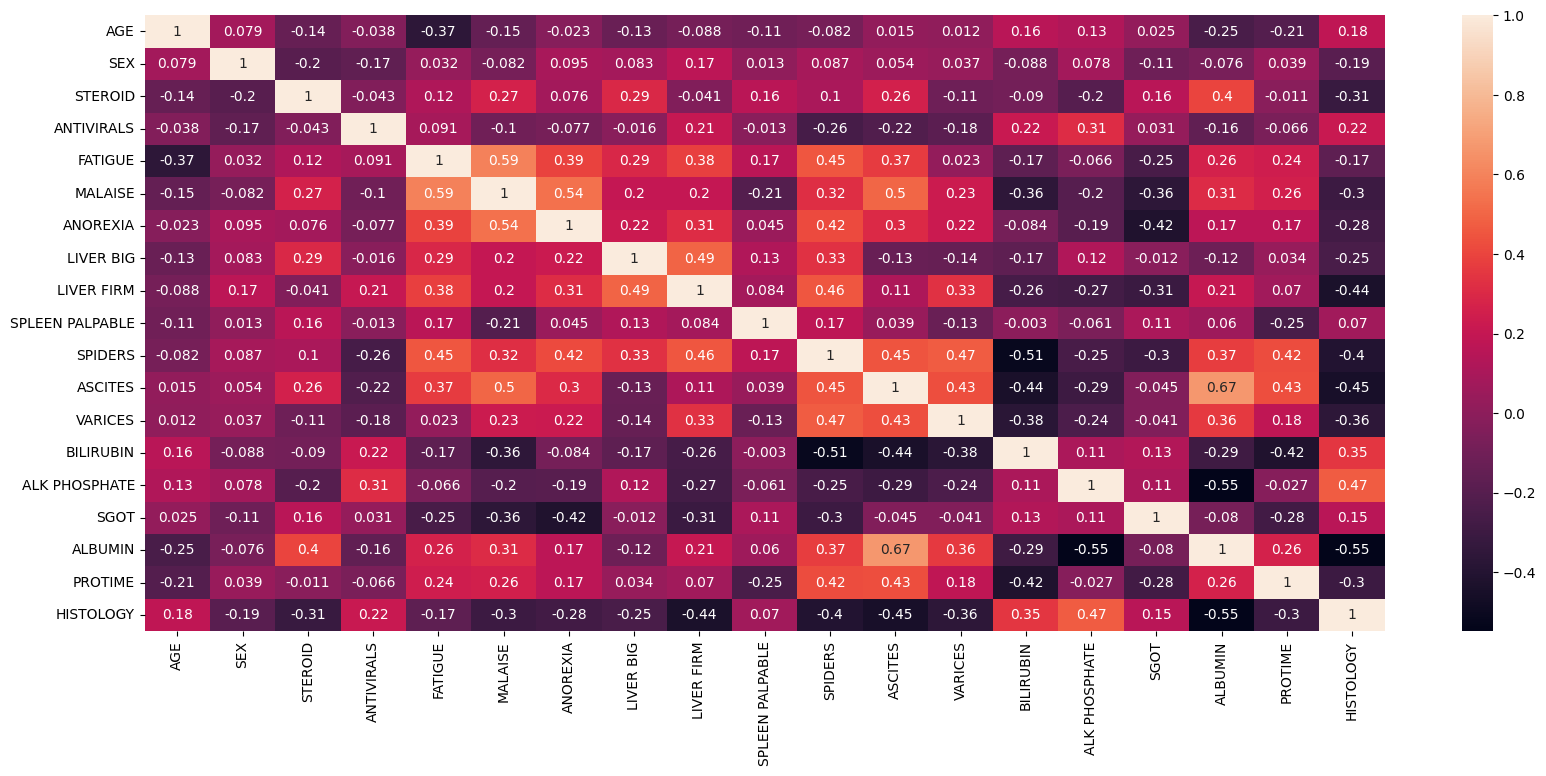

In [25]:
plt.figure(figsize=(20, 8))  # Adjust the figure size as needed
sns.heatmap(xtest.corr(), annot=True)

In [32]:
precision = precision_score(ytest.Class, ytest.Predicted_Class)
precision

0.5555555555555556

In [33]:
recall = recall_score(ytest.Class, ytest.Predicted_Class)
recall

0.5

In [34]:
f1 = f1_score(ytest.Class, ytest.Predicted_Class)
f1

0.5263157894736842

In [36]:
roc_auc = roc_auc_score(ytest.Class, ytest.Predicted_Class)
roc_auc

0.6959459459459458

In [29]:
print(classification_report(ytest.Class, ytest.Predicted_Class))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.56      0.50      0.53        10

    accuracy                           0.81        47
   macro avg       0.71      0.70      0.70        47
weighted avg       0.80      0.81      0.80        47



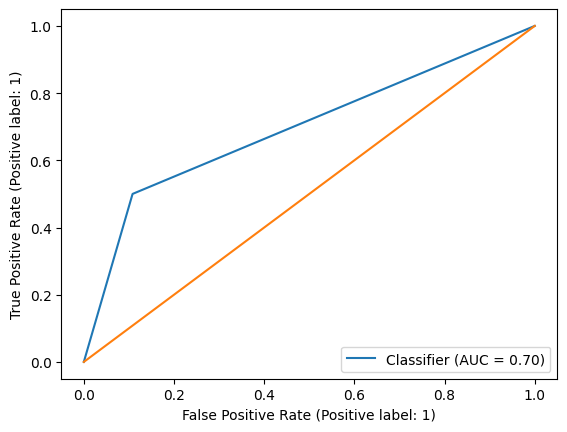

In [30]:
RocCurveDisplay.from_predictions(ytest.Class, ytest.Predicted_Class)
plt.plot([0,1],[0,1])
plt.show()

## 5. Results and Analysis

### Summarization of Results:

#### Confusion Matrix:

In [46]:
print("True Positives (TP):", cm[1][1]) 
print("True Negatives (TN):", cm[0][0])
print("False Positives (FP):", cm[0][1])
print("False Negatives (FN):", cm[1][0])

True Positives (TP): 5
True Negatives (TN): 33
False Positives (FP): 4
False Negatives (FN): 5


#### Precision

In [50]:
print("Precision is", round(precision,2))

Precision is 0.56


It indicates that when the model predicts a positive case, it is correct around 56% of the time.

#### Recall

In [53]:
print("Recall is", recall)

Recall is 0.5


It suggests that the model captures 50% of the actual positive cases.

#### F1 Score

In [54]:
print("F1 Score is", round(f1,2))

F1 Score is 0.53


#### AUC-ROC Score

In [55]:
print("AUC-ROC Score is", round(roc_auc,2)) 

AUC-ROC Score is 0.7


### Discussion of Strengths and Weaknesses:

#### Strengths:
- High True Negative Count: The model has a high count of True Negatives (33), indicating its proficiency in correctly identifying negative cases.

#### Weaknesses:
- Low Recall: The recall score of 0.5 suggests that the model is not effectively capturing all positive cases.

- Moderate Precision: While precision is reasonable at 0.56, it indicates that there is room for improvement in reducing false positives.

- Balancing Precision and Recall: The F1 Score of 0.53 suggests a trade-off between precision and recall. Depending on the specific requirements of the task, one might need to adjust the model to prioritize either precision or recall.

- AUC-ROC Score: Although the AUC-ROC Score is decent at 0.70, there is still room for improvement. A higher AUC-ROC score generally indicates better discrimination ability.